# Лабораторная работа 
**Максимовой Елизаветы,** 
**14ПМИ**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Чтение, описание и обработка данных

In [2]:
data = pd.read_csv('leaf.csv', sep = ',', engine = 'python', header=None)

In [3]:
data.columns = [u'Class', u'Specimen Number', u'Eccentricity', u'Aspect Ratio', u'Elongation',
       u'Solidity', u'Stochastic Convexity', u'Isoperimetric Factor', u'Maximal Indentation Depth', u'Lobedness',
       u'Average Intensity', u'Average Contrast', u'Smoothness', u'Third moment', u'Uniformity', u'Entropy']

Задача - классификация 40 различных видов растений по набору фигурных и текстурных признаков, извлеченных из цифровых изображений листовых образцов растений. На вход программе будет подаваться набор листиков с различными признаками (описанными ниже), на выходе ожидается определение растения (номер класса), к которому принадлежит данные лист
Пример используемых изображений:

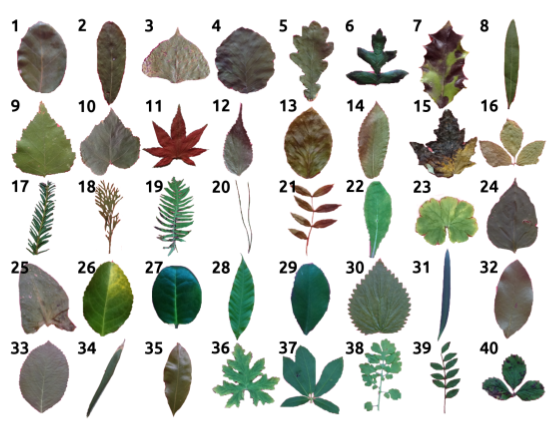

In [4]:
from IPython.display import Image
Image("Leaf.png")

Описание признаков объекта в исходном наборе данных:

**1. Класс растения** - всего в данных присутствую 36 разных видов растений (несмотря на картинку с примером)
    
**2. Номер образца**


Признаки по форме листа:

**3. Эксцентриситет**
    
**4. Соотношения сторон листа** - значения, близкие к 0 указывают на продолговатую форму
    
**5. Удлинение** - данная характеристика получается как разность между 1 и значением отношения между диаметром наибольшей вписанной окружности и диаметра наименьшего описанного круга
    
**6. Мера выпуклости** - измеряет, насколько хорошо лист прилегает к выпуклой форме
    
**7. Стохастическая выпуклость** - эта переменная расширяет обычное понятие выпуклости в топологическом смысле, используя выборку для выполнения расчета, целью является оценка вероятности, что все точки случайного отрезка [XY] (X, Y - принадлежать краям листа) лежат внутри листа
    
**8. Изопериметрический фактор** - максимальное значение этого параметра - 1 достигается при круговой области листа, плавные переплетенные контуры дают низкие значения
    
**9. Максимальная глубина отступа**

**10. Дольчатость** - эта особенность характеризует лепестки листа


Признаки по текстуре листа (параметры получены по статистическим свойствам гистограмм интенсивности преобразованных исходных изображений RGB в изображение из отенков серого):
   
**11. Средняя интенсивность** - средняя интенсивность изображения
    
**12. Средняя контрастность** - стандартное отклонение интенсивности изображения
    
**13. Гладкость** - нормализированная величина, измеряет относительную гладкость интенсивностей, принимает значение близкое к 0, если практически нет различий в значении интенсивности областей, и приближается к 1 в противном случае
    
**14. Третий момент** - нормализированная мера искажения гистограммы интенсивности
    
**15. Однородность** - принимает максимальное значение, если все уровни интенсивности областей равны
    
**16. Энтропия** - мера интенсивности случайности

Этот набор данных был создан исследователями Pedro F. B. Silva and AndrÃ© R. S. MarÃ§al с использованием фотографий листовых образцов, собранных Rubim Almeida da Silva на факультете естественных наук Университета Порту, Португалия.

In [5]:
data.shape

(340, 16)

Пример входных данных:

In [6]:
data.head()

,Class,Specimen Number,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214


In [7]:
data.tail()

,Class,Specimen Number,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
335,36,6,0.37522,1.1417,0.81725,0.68511,0.58772,0.125230,0.091860,1.5358,0.114880,0.20861,0.041703,0.013344,0.000820,2.0281
336,36,7,0.28064,1.0849,0.75319,0.72152,0.71404,0.136860,0.078996,1.1358,0.141220,0.21830,0.045488,0.012002,0.001515,2.4059
337,36,8,0.35344,1.0329,0.78147,0.70737,0.61579,0.135030,0.089763,1.4664,0.097663,0.20703,0.041101,0.016123,0.000453,1.6935
338,36,9,0.59988,1.1427,0.71532,0.66101,0.47544,0.157470,0.113370,2.3394,0.050389,0.13585,0.018121,0.006190,0.000265,1.1526
339,36,10,0.47195,1.0901,0.85409,0.53598,0.39649,0.078376,0.132270,3.1840,0.082007,0.18782,0.034074,0.013487,0.000329,1.5623


**Визуализируем несколько полезных для анализа графиков, проверяем данные на наличие коррелированных признаков**

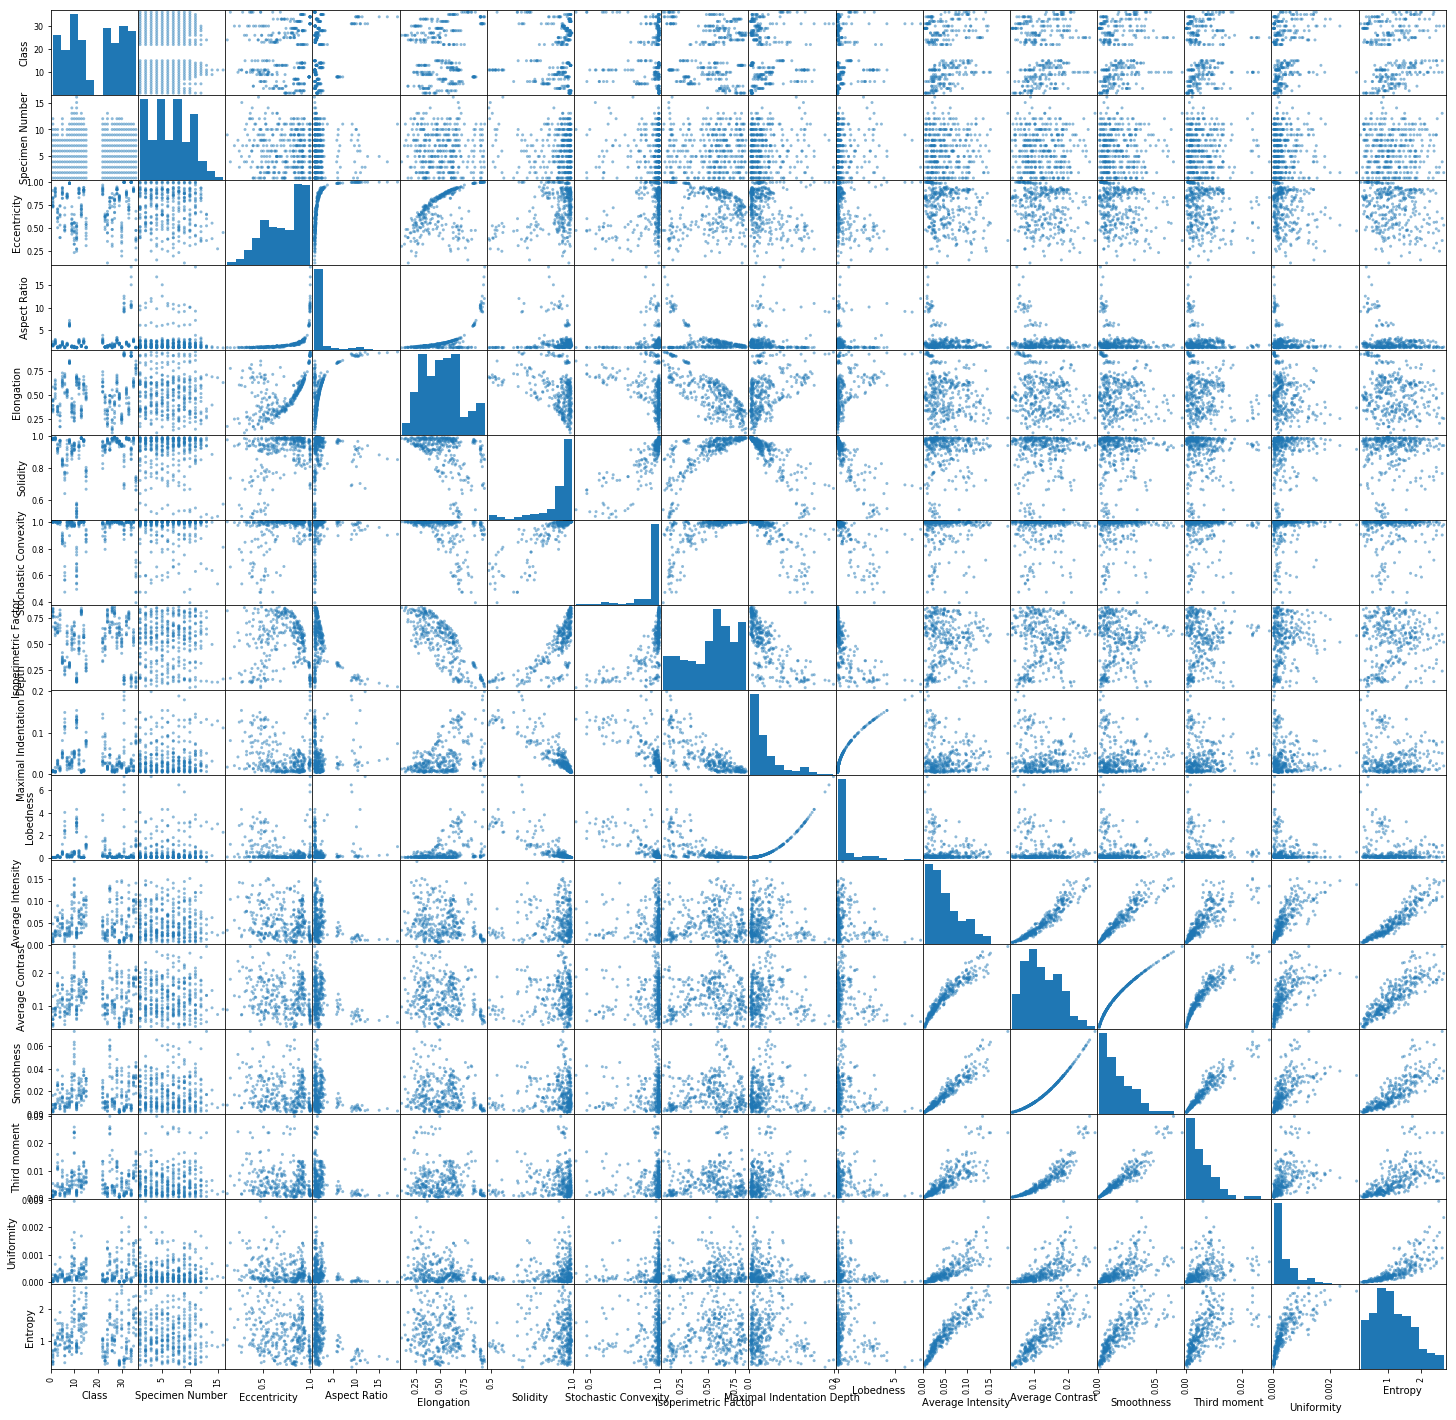

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .5, figsize = (25, 25))
pass

Посмотрим на матрицу корреляций:

In [9]:
corr = data.corr()
corr

,Class,Specimen Number,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
Class,1.000000,-0.015142,0.091415,0.275210,0.141275,0.111843,0.046678,-0.049767,-0.040026,-0.017048,0.102453,0.076246,0.094885,0.058520,0.187717,0.017690
Specimen Number,-0.015142,1.000000,-0.076772,-0.025490,-0.027722,-0.071623,-0.025219,0.004129,0.065016,0.062324,-0.009725,-0.012664,0.004628,0.010632,-0.040407,-0.033548
Eccentricity,0.091415,-0.076772,1.000000,0.551069,0.553561,0.373536,0.386332,-0.036086,-0.274361,-0.213635,-0.226307,-0.194736,-0.191061,-0.149555,-0.250345,-0.239689
Aspect Ratio,0.275210,-0.025490,0.551069,1.000000,0.678304,0.005173,0.107148,-0.471024,0.091851,0.122447,-0.282176,-0.297516,-0.263273,-0.233767,-0.229363,-0.312881
Elongation,0.141275,-0.027722,0.553561,0.678304,1.000000,-0.411437,-0.378827,-0.793095,0.437071,0.407873,-0.204517,-0.188545,-0.178534,-0.151095,-0.250682,-0.210903
Solidity,0.111843,-0.071623,0.373536,0.005173,-0.411437,1.000000,0.862526,0.755480,-0.885721,-0.823757,0.084869,0.082696,0.077565,0.058905,0.126263,0.055589
Stochastic Convexity,0.046678,-0.025219,0.386332,0.107148,-0.378827,0.862526,1.000000,0.655910,-0.769124,-0.699630,0.063159,0.057957,0.050713,0.036619,0.106687,0.052572
Isoperimetric Factor,-0.049767,0.004129,-0.036086,-0.471024,-0.793095,0.755480,0.655910,1.000000,-0.735776,-0.624161,0.080628,0.078250,0.074597,0.066503,0.133144,0.069783
Maximal Indentation Depth,-0.040026,0.065016,-0.274361,0.091851,0.437071,-0.885721,-0.769124,-0.735776,1.000000,0.946455,-0.090496,-0.088703,-0.058970,-0.023151,-0.137758,-0.111749
Lobedness,-0.017048,0.062324,-0.213635,0.122447,0.407873,-0.823757,-0.699630,-0.624161,0.946455,1.000000,-0.169071,-0.177816,-0.149011,-0.119249,-0.169245,-0.181064


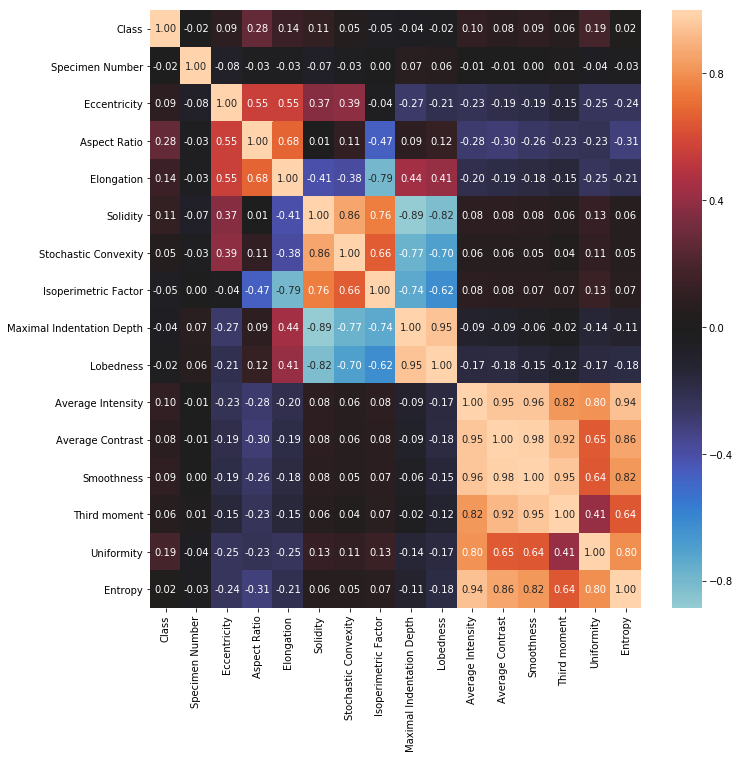

In [10]:
import seaborn as sns
plt.figure(figsize = (11,11))
sns.heatmap(corr, annot=True, fmt=".2f", center=0);

Посмотрим на некоторые графики зависимости двух признаков

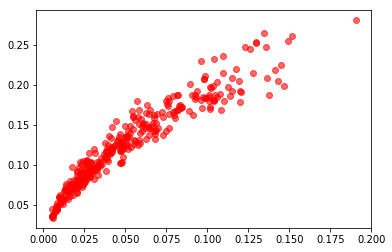

In [11]:
plt.plot(data['Average Intensity'], data['Average Contrast'], 'o', alpha = 0.6, color="red");

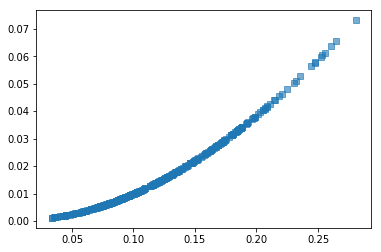

In [12]:
plt.plot(data['Average Contrast'], data['Smoothness'], 's', alpha = 0.6);

Анализируя матрицу корреляций, можно сделать вывод, что некоторые наборы признаков: **Средняя контрастность (Average Contrast)**, **Средняя интенсивность (Average Intensity)**, **Гладкость (Smoothness)** и **Гладкость (Smoothness)**, **Третий момент (Third moment)** сильно коррелированны. Поэтому удаляем столбцы **'Average Intensity'** и **'Smoothness'**, чтобы в данных не осталось скоррелированных признаков. Также удаляем атрибут **"Specimen Number" (Номер образца)**, так как он не несет в себе никакой полезной для анализа смысловой нагрузки.

In [13]:
data = data.drop('Average Intensity', axis = 1)\
           .drop('Smoothness', axis = 1)\
           .drop('Specimen Number', axis = 1)

**Первичная обработка данных, работа с пропущенными значениями, векторизация**

In [14]:
data.describe(include = 'all')

,Class,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Contrast,Third moment,Uniformity,Entropy
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,18.544118,0.719854,2.440210,0.513760,0.904158,0.943793,0.531234,0.037345,0.523845,0.124535,0.005928,0.000387,1.162630
std,11.152514,0.208311,2.599043,0.195583,0.114639,0.115047,0.217532,0.038575,1.039639,0.051860,0.005294,0.000431,0.584854
min,1.000000,0.117080,1.006600,0.107610,0.485490,0.396490,0.078376,0.002837,0.001464,0.033415,0.000229,0.000007,0.169400
25%,9.000000,0.550622,1.211300,0.349623,0.890667,0.966230,0.346818,0.009521,0.016500,0.083362,0.002080,0.000102,0.718900
50%,15.000000,0.763450,1.570750,0.501855,0.948130,0.992980,0.579160,0.023860,0.103615,0.119375,0.004447,0.000239,1.077450
75%,29.000000,0.895097,2.343100,0.633373,0.976897,1.000000,0.700712,0.047834,0.416433,0.163795,0.008307,0.000516,1.554575
max,36.000000,0.998710,19.038000,0.948340,0.993880,1.000000,0.858160,0.198980,7.206200,0.280810,0.029786,0.002936,2.708500


In [15]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

[]
['Class', 'Eccentricity', 'Aspect Ratio', 'Elongation', 'Solidity', 'Stochastic Convexity', 'Isoperimetric Factor', 'Maximal Indentation Depth', 'Lobedness', 'Average Contrast', 'Third moment', 'Uniformity', 'Entropy']


In [16]:
data.count(axis = 0)

Class                        340
Eccentricity                 340
Aspect Ratio                 340
Elongation                   340
Solidity                     340
Stochastic Convexity         340
Isoperimetric Factor         340
Maximal Indentation Depth    340
Lobedness                    340
Average Contrast             340
Third moment                 340
Uniformity                   340
Entropy                      340
dtype: int64

Как видно, в датасете **нет пропущенных значений** и **все признаки являются числовыми**, следовательно, векторизация в данном случае не нужна.

## Подготовка данных к работе алгоритмов

Отделим столбец с значением класса от таблицы атрибутов объектов, производим нормализацию данных, делим выборку на тренировочную и тестовую.

In [17]:
y = data['Class']
X = data.drop(('Class'), axis = 1)
print(X.shape)
print(y.shape)

(340, 12)
(340,)


In [18]:
X = (X - X.mean(axis = 0))/X.std(axis = 0)
X.describe()

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Contrast,Third moment,Uniformity,Entropy
count,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02
mean,-7.836868e-17,1.025324e-16,1.182714e-15,2.612289e-15,3.811330e-15,5.956020e-16,9.404242e-17,3.160870e-16,-8.228712e-17,2.089832e-16,2.559227e-16,-1.320839e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.893625e+00,-5.515916e-01,-2.076615e+00,-3.652049e+00,-4.757231e+00,-2.081802e+00,-8.945736e-01,-5.024633e-01,-1.757048e+00,-1.076344e+00,-8.814640e-01,-1.698253e+00
25%,-8.123989e-01,-4.728318e-01,-8.392240e-01,-1.176756e-01,1.950257e-01,-8.477669e-01,-7.212939e-01,-4.880009e-01,-7.939332e-01,-7.268709e-01,-6.604173e-01,-7.587023e-01
50%,2.092823e-01,-3.345309e-01,-6.087142e-02,3.835711e-01,4.275402e-01,2.203195e-01,-3.495692e-01,-4.042074e-01,-9.949592e-02,-2.797381e-01,-3.442725e-01,-1.456430e-01
75%,8.412579e-01,-3.736376e-02,6.115670e-01,6.345107e-01,4.885590e-01,7.791005e-01,2.719098e-01,-1.033170e-01,7.570472e-01,4.494055e-01,2.988933e-01,6.701592e-01
max,1.338651e+00,6.386117e+00,2.221971e+00,7.826495e-01,4.885590e-01,1.502892e+00,4.190168e+00,6.427570e+00,3.013427e+00,4.506561e+00,5.907140e+00,2.643174e+00


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

272 68


# k-nearest neighbors algorithm

Построим классификатор, например, для количества **"соседей" = 5**

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

Для оценки качества классификатора посчитаем значения ошибок на тренировочной и тестовой выборке:

In [21]:
err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.194852941176 0.367647058824


Построим матрицу ошибок для созданного классификатора:

In [22]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 

## Подбор параметров для модели

Для более точного обучения подберем оптимальное количество "соседей"

In [23]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=5)
grid.fit(X_train, y_train)
pass

**Наилучшее значение параметра 'n_neighbors' и ошибка на тренировочной выборки равны:**

In [24]:
best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_n_neighbors, best_cv_err)

1 0.286764705882


Построим классификатор для найденного значения параметра и посчитаем ошибки на тренировочной и тестовой выборке:

In [25]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.0 0.323529411765


Для нагладного представления визуализируем значение ошибки для тестовой и тренировочной выборки для разного количества "соседей"

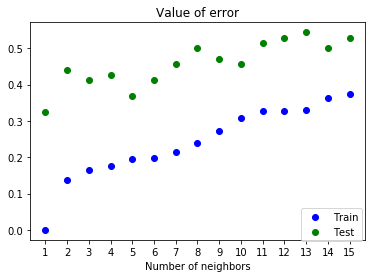

In [26]:
err_train_list = []
err_test_list = []
n = 16
for i in range(1, n):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    y_train_predict = knn.predict(X_train)
    y_test_predict = knn.predict(X_test)

    err_train_list.append(np.mean(y_train != y_train_predict))
    err_test_list.append(np.mean(y_test  != y_test_predict))

number = [i for i in range(1, n)]
plt.plot(number, err_train_list, 'go', label="Train", color="blue")
plt.plot(number, err_test_list, 'go', label="Test")
plt.xticks(number)
plt.xlabel("Number of neighbors")
plt.title('Value of error')
plt.legend(loc='center', bbox_to_anchor=(0.9, 0.07));

# Нейронная сеть

**Обучаем классификатор:**


In [27]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)
pass

Классифицируем некоторый объект, например, под индексом "39" из тестовой выборки:

In [28]:
No = 39
leaf = X_test[No:No+1]
cls = y_test[No:No+1]
leaf.head()

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Contrast,Third moment,Uniformity,Entropy
120,-0.949226,-0.508306,1.002744,-3.466336,-2.561337,-1.792997,2.451733,2.542761,-0.743754,-0.708034,-0.553317,-0.572006


In [29]:
cls

120    11
Name: Class, dtype: int64

In [30]:
mlp_model.predict(leaf)

array([11], dtype=int64)

На данном объекте классификатор сработал правильно!
Теперь рассмотрим объект, например, под индексом "8" из тестовой выборки:

In [31]:
No = 8
leaf = X_test[No:No+1]
cls = y_test[No:No+1]
leaf.head()

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Contrast,Third moment,Uniformity,Entropy
89,-1.11926,-0.470831,-0.699705,-0.022224,0.442838,0.040575,-0.133859,-0.322578,1.142222,0.680242,1.319736,1.263855


In [32]:
cls

89    9
Name: Class, dtype: int64

In [33]:
mlp_model.predict(leaf)

array([10], dtype=int64)

К сожалению, на данном объекте классификатор сработал неправильно!

**Проверяем качество классификатора:**

In [34]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

Посчитаем ошибки на обучающей и тестовой выборках:

In [35]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0 0.352941176471


# Подбор гиперпараметров

## Количество нейронов на скрытом слое

**Способ 1 - вручную написанным циклом**

In [36]:
hidden_layer_sizes_arr = [(x,) for x in range(10, 300, 10)]
test_err = []
train_err = []
for n in hidden_layer_sizes_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = n, 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

Визуализируем на графике значения ошибок на тренировочной и тестовой выборке при обучении модели с разным количеством нейронов:

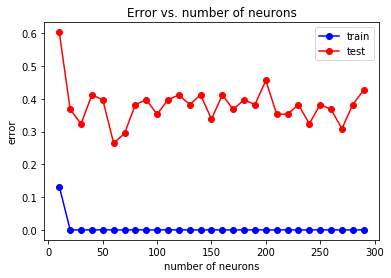

In [37]:
n_arr = np.arange(10, 300, 10)
plt.plot(n_arr, train_err, 'b-o', label = 'train')
plt.plot(n_arr, test_err, 'r-o', label = 'test')
plt.title('Error vs. number of neurons')
plt.xlabel('number of neurons')
plt.ylabel('error')
plt.legend()
pass

Получаем, что в данном диапозоне значений количества нейронов минимальные ошибки на тренировочной и тестовой выборке равны:

In [38]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.264705882353


а оптимальное количество нейронов равно:

In [39]:
n_opt = n_arr[test_err == min_test_err]
print(n_opt)

[60]


In [40]:
n_opt = n_opt[0]

#### Построим нейронную сеть при найденном _оптимальном_ значении количества нейронов:

Повторим обучение с заданным количеством нейронов и посмотри на ошибки на тренировочной и тестовой выборке:

In [41]:
mlp_model = MLPClassifier(hidden_layer_sizes = (n_opt,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
errTrain = np.mean(y_train != y_train_pred)
errTest = np.mean(y_test != y_test_pred)
print(errTrain)
print(errTest)

0.0
0.264705882353


**Способ 2 - при помощи GridSearchCV**

In [42]:
from sklearn.model_selection import GridSearchCV

Указываем функцию подсчета ошибки

In [43]:
def scorer(network, X, y):
    result = network.predict(X)
    return 1 - np.mean(y != result)

Ищем оптимальный параметр:

In [44]:
hidden_layer_sizes_arr = [(x,) for x in range(10, 300, 10)]
mlp_modelCV = MLPClassifier(solver = 'lbfgs', activation = 'logistic', random_state = 42)
cv = GridSearchCV(mlp_modelCV, {'hidden_layer_sizes': hidden_layer_sizes_arr}, scoring = scorer, cv=4)
cv.fit(X_train, y_train)
pass

Получаем, что наилучшее количество нейронов равно

In [45]:
n_opt_new = cv.best_params_['hidden_layer_sizes']
print(n_opt_new)

(220,)


#### Построим нейронную сеть при найденном _оптимальном_ значении количества нейронов:

Повторим обучение с заданным количеством нейронов и посмотри на ошибки на тренировочной и тестовой выборке:

In [46]:
mlp_model = MLPClassifier(hidden_layer_sizes = n_opt_new,
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
errTrain_new = np.mean(y_train != y_train_pred)
errTest_new = np.mean(y_test != y_test_pred)
print(errTrain_new)
print(errTest_new)

0.0
0.352941176471


In [47]:
print(n_opt, errTrain, errTest)
print(n_opt_new[0], errTrain_new, errTest_new)

60 0.0 0.264705882353
220 0.0 0.352941176471


Обратим внимание, что хоть эти способы и показали разные наилучшие значения параметров, ошибки при этих двух показателях на тренировочной и тестовой выборках равны, значит **оба этих значений являются оптимальными**.

Для дальнейшего анализа сохраним наименьшее из этих значений, так как это увеличит скорость тренировки и прогнозирования сети.

In [48]:
n_opt = np.min([n_opt, n_opt_new[0]])
n_opt

60

## Параметр регуляризации alpha

**Способ 1 - вручную написанным циклом**

In [49]:
alpha_arr = np.linspace(0.0001, 0.2, 60)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = n_opt, alpha = alpha,
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

Визуализируем на графике значения ошибок на тренировочной и тестовой выборке при обучении модели с разными значениями alpha:

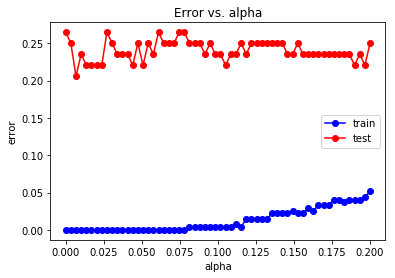

In [50]:
plt.plot(alpha_arr, train_err, 'b-o', label = 'train')
plt.plot(alpha_arr, test_err, 'r-o', label = 'test')
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Получаем, что в данном диапозоне значений параметра alpha минимальные ошибки на тренировочной и тестовой выборке равны:

In [51]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.205882352941


а оптимальное значение alpha равно:

In [52]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[ 0.00687627]


In [53]:
alpha_opt = alpha_opt[0]

#### Построим нейронную сеть при найденном _оптимальном_ значении параметра alpha:

Повторим обучение с заданным параметра alpha и посмотрим на ошибки на тренировочной и тестовой выборке:

In [54]:
mlp_model = MLPClassifier(hidden_layer_sizes = (n_opt,), alpha = alpha_opt,
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
errTrain = np.mean(y_train != y_train_pred)
errTest = np.mean(y_test != y_test_pred)
print(errTrain)
print(errTest)

0.0
0.205882352941


**Способ 2 - при помощи GridSearchCV**

Ищем оптимальный параметр:

In [55]:
alpha_arr = np.linspace(0.0001, 0.1, 60)
mlp_modelCV = MLPClassifier(hidden_layer_sizes = (n_opt,), solver = 'lbfgs', activation = 'logistic', random_state = 42)
cv = GridSearchCV(mlp_modelCV, {'alpha': alpha_arr}, scoring = scorer,  cv=8)
cv.fit(X, y)
pass

Получаем, что наилучшее значение параметра alpha равно

In [56]:
alpha_opt_new = cv.best_params_['alpha']
print(alpha_opt_new)

0.0305779661017


#### Построим нейронную сеть при найденном _оптимальном_ значении параметра alpha:

Повторим обучение с заданным параметра alpha и посмотрим на ошибки на тренировочной и тестовой выборке:

In [57]:
mlp_model = MLPClassifier(hidden_layer_sizes = (n_opt,), alpha = alpha_opt_new,
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
errTrain_new = np.mean(y_train != y_train_pred)
errTest_new = np.mean(y_test != y_test_pred)
print(errTrain_new)
print(errTest_new)

0.0
0.25


In [58]:
print(alpha_opt, errTrain, errTest)
print(alpha_opt_new, errTrain_new, errTest_new)

0.00687627118644 0.0 0.205882352941
0.0305779661017 0.0 0.25


Обратим внимание, что эти способы нашли **разные оптимальные значения параметра alpha**. Как видно, цикл с построением всех моделей нашел значение параметра лучше. Это связано с тем, что функция GridSearchCV сама делит данные на тренировочную и тестовую выборки.

Для дальнейшего анализа сохраним наилучшее значение параметра alpha

In [59]:
if errTest > errTest_new:
    alpha_opt = alpha_opt_new
alpha_opt

0.0068762711864406786

#### Построим итоговую нейронную сеть с подобранными оптимальными параметрами

In [60]:
mlp_model = MLPClassifier(hidden_layer_sizes = (n_opt,), alpha = alpha_opt,
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
errTrain = np.mean(y_train != y_train_pred)
errTest = np.mean(y_test != y_test_pred)
print(errTrain)
print(errTest)

0.0
0.205882352941


## Другие метрики качества

### Матрица рассогласования:

In [61]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 

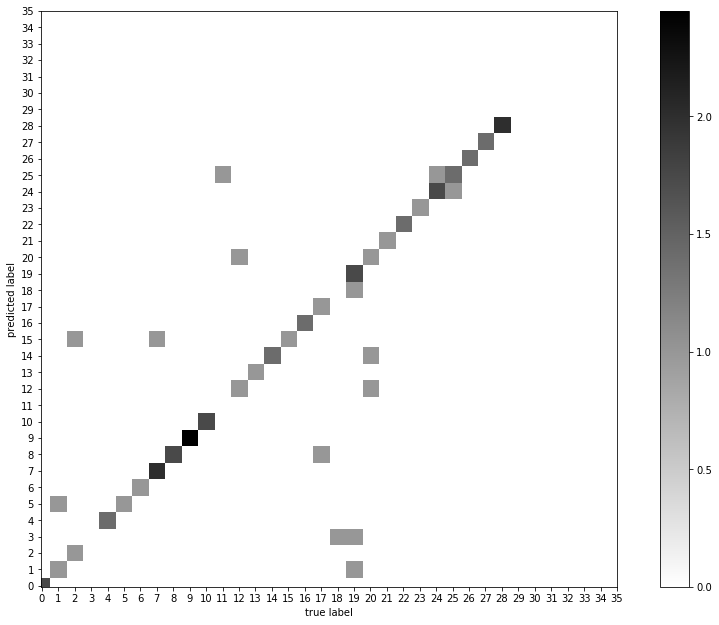

In [62]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.axes([2, 2, 2, 2])
plt.axis('scaled')
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(36))
plt.yticks(range(36))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

### precision, recall , f1-score

${\rm error} = \frac{{\rm FP} + {\rm FN}}{{\rm TP} + {\rm TN} + {\rm FP} + {\rm FN}}$ 

${\rm accuracy} = \frac{{\rm TP} + {\rm TN}}{{\rm TP} + {\rm TN} + {\rm FP} + {\rm FN}} = 1 - {\rm error}$ 

${\rm precision} = \frac{{\rm TP}}{{\rm FP}+{\rm TP}}$ 

$F_1 = 2\cdot\frac{{\rm precision}\cdot{\rm recall}}{{\rm precision}+{\rm recall}}$ 

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00         3
          2       0.50      0.50      0.50         2
          3       1.00      0.50      0.67         2
          4       0.00      0.00      0.00         0
          6       1.00      1.00      1.00         2
          7       0.50      1.00      0.67         1
          8       1.00      1.00      1.00         1
          9       1.00      0.80      0.89         5
         10       0.75      1.00      0.86         3
         11       1.00      1.00      1.00         6
         12       1.00      1.00      1.00         3
         13       0.00      0.00      0.00         1
         14       0.50      0.50      0.50         2
         15       1.00      1.00      1.00         1
         22       0.67      1.00      0.80         2
         23       0.33      1.00      0.50         1
         24       1.00      1.00      1.00         2
         25       1.00      0.50      0.67   

C:\Users\maks_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\maks_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Из данной таблицы видно, что хуже всего классификатор работаес с растением **№28**, чуть лучше (но не совсем приемлемо, так как f1-score = 0.5) с растениями **№2, №14, №23** и показывает неплохие результаты на остальных растениях. 
Так же отметим, что классификатор идеально (на представленных данных) определяет растения **№1, №6, №8, №11, №12, №15, №24, №29, №30, №31, №34, №35, №36**.

## Ошибки в работе нейронной сети

Выведем все объекты с атрибутами, для которых классификатор не смог правильно определить класс

In [64]:
err_number = 0
for i in range(N_test):
    leaf = X_test[i:i+1]
    cls = y_test[i:i+1]
    cls_pred = mlp_model.predict(leaf)
    if cls_pred[0] != cls.values[0]:
        print("\nWrong class = ",cls_pred[0], "\nObject: ", leaf.head())
        err_number +=1


Wrong class =  14 
Object:       Eccentricity  Aspect Ratio  Elongation  Solidity  Stochastic Convexity  \
248      0.964691      0.184526    0.739786  0.562219              0.473348   

     Isoperimetric Factor  Maximal Indentation Depth  Lobedness  \
248             -0.037896                  -0.667729  -0.480366   

     Average Contrast  Third moment  Uniformity   Entropy  
248           0.84623      0.999653   -0.332962  0.133316  

Wrong class =  26 
Object:       Eccentricity  Aspect Ratio  Elongation  Solidity  Stochastic Convexity  \
238      -0.26088     -0.414964   -1.256349  0.744355              0.488559   

     Isoperimetric Factor  Maximal Indentation Depth  Lobedness  \
238              1.079367                  -0.833848  -0.499176   

     Average Contrast  Third moment  Uniformity   Entropy  
238         -0.966895     -0.776544   -0.775943 -0.922384  

Wrong class =  33 
Object:       Eccentricity  Aspect Ratio  Elongation  Solidity  Stochastic Convexity  \
147   

Всего в исходных данных столько объектов, на которых нейронная сеть с подобранными оптимальными параметрами не смогла правильно определить растение:

In [65]:
err_number

14